In [1]:
# load appropriate modules
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
from xgcm import Grid
from scipy import linalg as lin
from scipy import signal as sig
from scipy import fftpack as fft
from scipy import interpolate as naiso
from matplotlib import colors, ticker, cm
import xrft
#import gsw

In [2]:
from xgcm import Grid

In [3]:
dir_zarr = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/'
ds_model = xr.open_zarr(dir_zarr)

In [4]:
plt.rcParams.update({'font.size': 12})

In [5]:
grid = Grid(ds_model, periodic='X')

In [15]:
Up = ds_model.U - ds_model.U.mean('time')
Vp = ds_model.V - ds_model.V.mean('time')

In [34]:
Up_x = grid.diff(Up, 'X')/5e3
Up_y = grid.interp(grid.interp(grid.diff(Up, 'Y', boundary='extend'), 'X'), 'Y', boundary='extend')/5e3

In [35]:
Vp_x = grid.interp(grid.interp(grid.diff(Vp, 'X'), 'X'), 'Y', boundary='extend')/5e3
Vp_y = grid.diff(Vp, 'Y', boundary='extend')/5e3

In [36]:
strain = ((Up_x - Vp_y)**2 + (Vp_x + Up_y)**2)

In [54]:
strain_x = ((Up_x)**2 + (Vp_x)**2)
strain_y = ((Up_y)**2 + (Vp_y)**2)

In [37]:
EKE = (grid.interp(Up, 'X')**2 + grid.interp(Vp, 'Y', boundary='extend')**2)

In [38]:
L_perturb = (EKE / strain)**0.5

In [55]:
Lx = (EKE / strain_x)**0.5
Ly = (EKE / strain_y)**0.5

In [56]:
Lxmean = Lx.mean('time')
Lymean = Ly.mean('time')

In [51]:
Lmean = L_perturb.mean('time')

In [52]:
Lmean.load()
Lxmean.load()
Lymean.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[    0.    ,     0.    ,     0.    , ...,     0.    ,
             0.    ,     0.    ],
        [10530.976 , 10467.44  , 10658.416 , ..., 10650.444 ,
         10624.525 , 10795.0205],
        [16405.926 , 16516.805 , 16167.52  , ..., 14889.182 ,
         15579.168 , 17110.508 ],
        ...,
        [38345.844 , 36676.527 , 39265.477 , ..., 40749.3   ,
         37617.66  , 36965.715 ],
        [34234.953 , 34752.15  , 32883.68  , ..., 33335.78  ,
         34041.113 , 33948.027 ],
        [37635.742 , 38625.71  , 38612.688 , ..., 39950.914 ,
         39592.453 , 38565.2   ]],

       [[    0.    ,     0.    ,     0.    , ...,     0.    ,
             0.    ,     0.    ],
        [10836.141 , 10651.3125, 11299.512 , ..., 10771.937 ,
         10636.736 , 10850.459 ],
        [16378.304 , 16820.346 , 16470.38  , ..., 15043.251 ,
         15789.482 , 16738.572 ],
        ...,
        [37766.14  , 37051.848 , 35993.99  , ..., 39043.832 ,
 

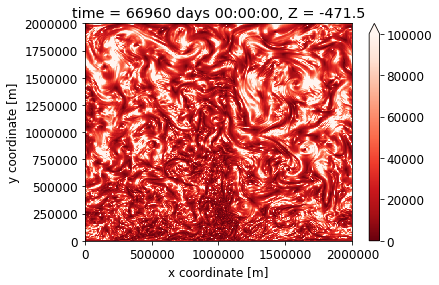

In [109]:
L_perturb.sel(Z=-500, method='nearest').isel(time=-1).plot(vmax=100e3, cmap='Reds_r')

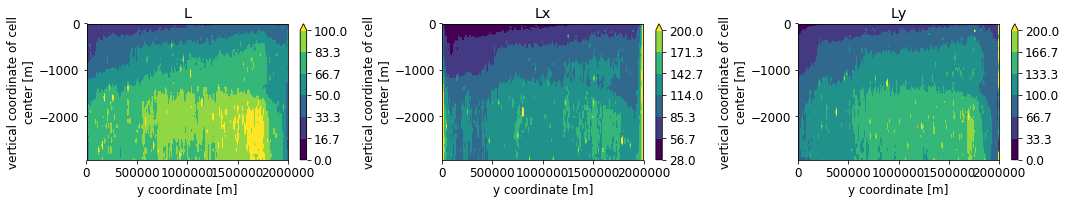

In [86]:
plt.figure(figsize=(15,3))

plt.subplot(131)
(Lmean/1e3).sel(XC=0, method='nearest').plot.contourf(vmax=100)
plt.title('L')

plt.subplot(132)
(Lxmean/1e3).sel(XC=0, method='nearest').plot.contourf(vmax=200)
plt.title('Lx')

plt.subplot(133)
(Lymean/1e3).sel(XC=0, method='nearest').plot.contourf(vmax=200)
plt.title('Ly')

plt.tight_layout()

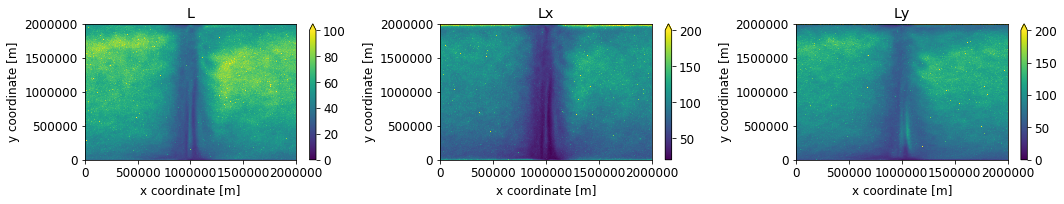

In [63]:
plt.figure(figsize=(15,3))

plt.subplot(131)
(Lmean/1e3).sel(Z=-1000, method='nearest').plot(vmax=100)
plt.title('L')

plt.subplot(132)
(Lxmean/1e3).sel(Z=-1000, method='nearest').plot(vmax=200)
plt.title('Lx')

plt.subplot(133)
(Lymean/1e3).sel(Z=-1000, method='nearest').plot(vmax=200)
plt.title('Ly')

plt.tight_layout()

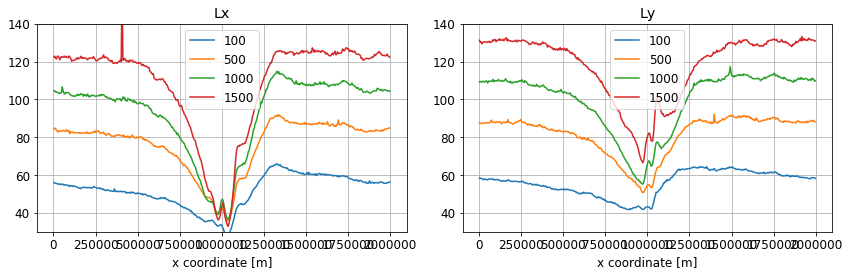

In [87]:
plt.figure(figsize=(12,4))
plt.subplot(121)
(Lxmean/1e3).sel(Z=-100, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=100)
(Lxmean/1e3).sel(Z=-500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=500)
(Lxmean/1e3).sel(Z=-1000, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1000)
(Lxmean/1e3).sel(Z=-1500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1500)
plt.grid()
plt.legend()
plt.ylim([30,140])
plt.title('Lx')

plt.subplot(122)
(Lymean/1e3).sel(Z=-100, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=100)
(Lymean/1e3).sel(Z=-500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=500)
(Lymean/1e3).sel(Z=-1000, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1000)
(Lymean/1e3).sel(Z=-1500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1500)
plt.grid()
plt.legend()
plt.ylim([30,140])
plt.title('Ly')

plt.tight_layout()

(0.35, 1.1)

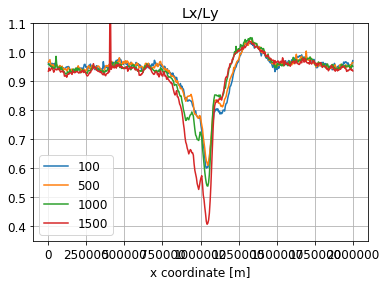

In [88]:
(Lxmean/Lymean).sel(Z=-100, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=100)
(Lxmean/Lymean).sel(Z=-500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=500)
(Lxmean/Lymean).sel(Z=-1000, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1000)
(Lxmean/Lymean).sel(Z=-1500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1500)
plt.grid()
plt.legend()
plt.title('Lx/Ly')
plt.ylim([0.35, 1.1])

In [120]:
mixing_lengths = xr.merge([Lmean.rename('L'), Lxmean.rename('Lx'), Lymean.rename('Ly')])

In [122]:
mixing_lengths.to_netcdf('mixing_lengths.nc')

In [114]:
(Lmean/1e3).sel(Z=-500, method='nearest').mean('time').plot.contourf(vmax=100, cmap='Reds')

ValueError: 'time' not found in array dimensions ('YC', 'XC')

In [91]:
EKE_mean = EKE.mean('time')

In [98]:
EKE_mean.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.01591817, 0.01598948, 0.01605273, ..., 0.01534368,
         0.01560798, 0.01581966],
        [0.01199151, 0.01203266, 0.01204059, ..., 0.01145576,
         0.01165368, 0.01184268],
        ...,
        [0.01444024, 0.01434083, 0.01422798, ..., 0.01459836,
         0.01455854, 0.01451159],
        [0.01595095, 0.01585802, 0.01573557, ..., 0.01604996,
         0.01603733, 0.01600963],
        [0.01839061, 0.01834692, 0.01824378, ..., 0.01841226,
         0.0183986 , 0.01839413]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.01579186, 0.01586464, 0.01592777, ..., 0.01522651,
         0.01548822, 0.01569575],
        [0.01185004, 0.01189439, 0.01190469, ..., 0.01132312,
         0.01151588, 0.01170181],
        ...,
        [0.01435732, 0.01425954, 0.01415181, ..., 0.01451524,
 

Text(0.5, 1.0, 'Lx/Ly')

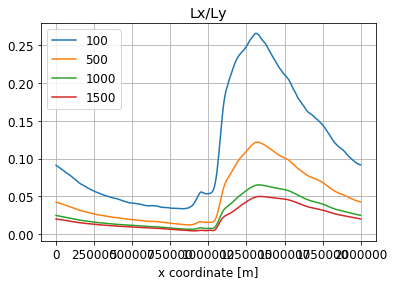

In [93]:
(EKE_mean).sel(Z=-100, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=100)
(EKE_mean).sel(Z=-500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=500)
(EKE_mean).sel(Z=-1000, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1000)
(EKE_mean).sel(Z=-1500, method='nearest').sel(YC=slice(400e3,1600e3)).mean('YC').plot(label=1500)
plt.grid()
plt.legend()
plt.title('Lx/Ly')
#plt.ylim([0.35, 1.1])

In [102]:
K = (EKE_mean**0.5)*Lmean

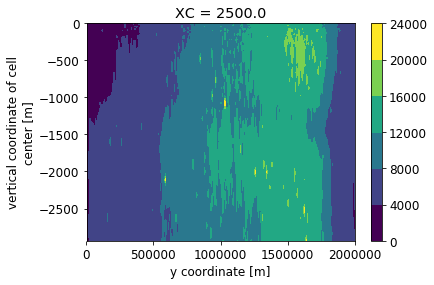

In [103]:
K.sel(XC=0, method='nearest').plot.contourf()

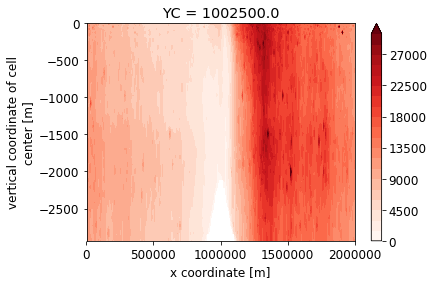

In [113]:
K.sel(YC=1000e3, method='nearest').plot.contourf(vmax=30e3, levels=21, cmap='Reds')

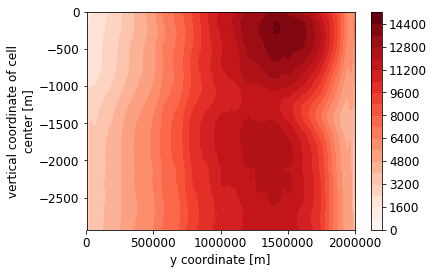

In [111]:
K.mean('XC').plot.contourf(levels=21, cmap='Reds')